In [84]:

import pandas as pd
import pandas
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [85]:
df = pd.read_csv('Resources/US_French_CabSauvi_Bordeauxs.csv')
df

,Unnamed: 0,ID,alcohol,category,country,description,designation,index,price,rating,region,subregion,subsubregion,title,url,varietal,vintage,winery
0,0,NaN,14.0,Red,France,This young wine is so full of fruit. Blackberr...,NaN,5968.0,12.0,86,Bordeaux,Bordeaux,NaN,Château Taussin 2016 Bordeaux,https://www.winemag.com/buying-guide/chateau-t...,Bordeaux-style Red Blend,2016,Château Taussin
1,3,NaN,12.0,Red,France,"Soft, lightweight wine, with gentle tannins an...",NaN,6411.0,14.0,84,Bordeaux,Bordeaux,NaN,Château Dame Jane 2010 Bordeaux,https://www.winemag.com/buying-guide/chateau-d...,Bordeaux-style Red Blend,2010,Château Dame Jane
2,4,NaN,12.5,Red,France,Simply fruity Bordeaux. It has signs of wood a...,Prince Rubis,6412.0,25.0,84,Bordeaux,Bordeaux,NaN,De Mour 2008 Prince Rubis (Bordeaux),https://www.winemag.com/buying-guide/mour-2008...,Bordeaux-style Red Blend,2008,De Mour
3,5,NaN,13.5,Red,France,"Full and rich, this wine has weight and good p...",La Grande Cuvée,5786.0,14.0,88,Bordeaux,Bordeaux,NaN,Dourthe 2016 La Grande Cuvée (Bordeaux),https://www.winemag.com/buying-guide/dourthe-2...,Bordeaux-style Red Blend,2016,Dourthe
4,6,NaN,13.5,Red,France,This concentrated wine with dense tannins is p...,La Freynelle,5787.0,14.0,88,Bordeaux,Bordeaux,NaN,Château la Freynelle 2016 La Freynelle (Borde...,https://www.winemag.com/buying-guide/chateau-l...,Bordeaux-style Red Blend,2016,Château la Freynelle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12077,12216,248205.0,14.2,Red,US,"This is a good Cask 23, but it's by no means a...",Cask 23,NaN,175.0,89,California,Napa,Napa Valley,Stag's Leap Wine Cellars 2003 Cask 23 Cabernet...,https://www.winemag.com/buying-guide/stags-lea...,Cabernet Sauvignon,2003,Stag's Leap Wine Cellars
12078,12217,248238.0,14.5,Red,US,"This is a young, immature wine, but a charming...",Herrick Vineyard,NaN,45.0,90,California,Napa,Yountville,Conn Creek 2003 Herrick Vineyard Cabernet Sauv...,https://www.winemag.com/buying-guide/conn-cree...,Cabernet Sauvignon,2003,Conn Creek
12079,12218,248254.0,14.8,Red,US,Fisher's been on a roll with this wine. While ...,Coach Insignia,NaN,70.0,90,California,Napa,Napa Valley,Fisher 2003 Coach Insignia Cabernet Sauvignon ...,https://www.winemag.com/buying-guide/fisher-20...,Cabernet Sauvignon,2003,Fisher
12080,12219,248264.0,14.8,Red,US,An interesting Cab that's taking the lead in t...,Estate Bottled,NaN,30.0,90,California,Sierra Foothills,Shenandoah Valley (CA),Easton 2003 Estate Bottled Cabernet Sauvignon ...,https://www.winemag.com/buying-guide/easton-20...,Cabernet Sauvignon,2003,Easton


In [86]:
df = df.drop(['Unnamed: 0', 'ID', 'index', 'category', 'description', 'designation', 'subsubregion', 'title', 'url', 'varietal', 'winery'], axis=1)
df.head()


,alcohol,country,price,rating,region,subregion,vintage
0,14.0,France,12.0,86,Bordeaux,Bordeaux,2016
1,12.0,France,14.0,84,Bordeaux,Bordeaux,2010
2,12.5,France,25.0,84,Bordeaux,Bordeaux,2008
3,13.5,France,14.0,88,Bordeaux,Bordeaux,2016
4,13.5,France,14.0,88,Bordeaux,Bordeaux,2016


In [87]:
X_df = pd.DataFrame(df)
X_df.dtypes
X_df['subregion'] = X_df['subregion'].astype(str)
# X_df['vintage'] = X_df['vintage'].astype(float)

In [88]:
X = X_df.drop("price", axis=1)
y = df["price"]

In [89]:
X= X.apply(LabelEncoder().fit_transform)
X

,alcohol,country,rating,region,subregion,vintage
0,37,0,6,1,1,28
1,5,0,4,1,1,22
2,11,0,4,1,1,20
3,23,0,8,1,1,28
4,23,0,8,1,1,28
...,...,...,...,...,...,...
12077,43,1,9,2,19,15
12078,50,1,10,2,19,15
12079,59,1,10,2,19,15
12080,59,1,10,2,29,15


In [90]:
X = X.values.astype("float32")
print(X)
y = y.values.astype("float32")
print(y)

[[37.  0.  6.  1.  1. 28.]
 [ 5.  0.  4.  1.  1. 22.]
 [11.  0.  4.  1.  1. 20.]
 ...
 [59.  1. 10.  2. 19. 15.]
 [59.  1. 10.  2. 29. 15.]
 [43.  1. 11.  2. 19. 15.]]
[12. 14. 25. ... 70. 30. 47.]


In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)
print(y_test.shape)
print(X_test.shape)

(3021,)
(3021, 6)


In [92]:
scaler_model = StandardScaler()

In [93]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [95]:
X_scaler = scaler_model.fit(X_train)
y_scaler = scaler_model.fit(y_train)

In [96]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [97]:
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [98]:
input_dims = X_train.shape[1]
input_dims

6

In [109]:
model = []
model = Sequential()
model.add(Dense(64, activation = 'relu', name='dense_1', kernel_initializer='glorot_uniform', input_dim=(input_dims)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', name='dense_2', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear', name='predictions'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                448       
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
predictions (Dense)          (None, 1)                 33        
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


In [110]:
from numpy import sqrt,asarray
model.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])
history = model.fit(X_train_scaled, y_train_scaled, epochs=30, batch_size=10,  verbose=1, validation_split=0.2)


Train on 7248 samples, validate on 1813 samples
Epoch 1/30
7248/7248 [==============================] - 1s 171us/step - loss: 0.8357 - mse: 0.8357 - mae: 0.6015 - val_loss: 0.5892 - val_mse: 0.5892 - val_mae: 0.5135
Epoch 2/30
7248/7248 [==============================] - 1s 101us/step - loss: 0.7102 - mse: 0.7102 - mae: 0.5438 - val_loss: 0.5159 - val_mse: 0.5159 - val_mae: 0.4482
Epoch 3/30
7248/7248 [==============================] - 1s 97us/step - loss: 0.6578 - mse: 0.6578 - mae: 0.5251 - val_loss: 0.5065 - val_mse: 0.5065 - val_mae: 0.5101
Epoch 4/30
7248/7248 [==============================] - 1s 95us/step - loss: 0.6321 - mse: 0.6321 - mae: 0.5137 - val_loss: 0.4573 - val_mse: 0.4573 - val_mae: 0.4585
Epoch 5/30
7248/7248 [==============================] - 1s 100us/step - loss: 0.6119 - mse: 0.6119 - mae: 0.5103 - val_loss: 0.4540 - val_mse: 0.4540 - val_mae: 0.4623
Epoch 6/30
7248/7248 [==============================] - 1s 106us/step - loss: 0.6100 - mse: 0.6100 - mae: 0.5091 -

In [111]:
error = model.evaluate(X_test_scaled, y_test_scaled, verbose=2)
# print('MSE: %.3f, RMSE: %.3f' % (error, sqrt(error)))
print(error, sqrt(error))



[0.6733076097958532, 0.6733075976371765, 0.497531533241272] [0.82055323 0.82055323 0.70535915]


dict_keys(['val_loss', 'val_mse', 'val_mae', 'loss', 'mse', 'mae'])


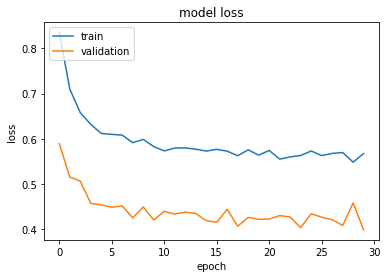

In [112]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [23]:
# from collections import defaultdict
# d = defaultdict(LabelEncoder)

# labeled_df = X_df.apply(lambda x: d[x.name].fit_transform(x))
# labeled_df
# labeled_df.apply(lambda x: d[x.name].inverse_transform(x))

In [113]:
test = np.expand_dims(X_train_scaled[1], axis=0)
inversedX = scaler_model.inverse_transform(test)
inversedy = scaler_model.inverse_transform(y_train_scaled[1])

In [114]:
print(f"Predicted price: {model.predict(inversedX)}")
print(f"Actual price: {inversedy}")

Predicted price: [[26.61973]]
Actual price: [42.]


In [77]:
# from sklearn.metrics import mean_squared_error
# prediction = model.predict(X_train)
# print(prediction)
# MSE = mean_squared_error(y[0], scaler_model.inverse_transform(prediction))
# MSE
